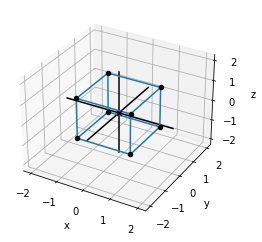

In [12]:
# Exercise 3.2 Mini Project
#
# There are exactly eight 3D vectors whose coordinates are all either +1 or –1.
# For instance, (1, –1, 1) is one of these. Plot all of these eight vectors as
# points. Then figure out how to connect them with line segments using Segment3D
# objects to form the outline of a cube.

from draw3d import *

vs = [1, -1]
points = [(x, y, z) for x in vs for y in vs for z in vs]

x_edges = [((-1, y, z), ((1, y, z))) for y in vs for z in vs]
y_edges = [((x, -1, z), ((x, 1, z))) for x in vs for z in vs]
z_edges = [((x, y, -1), ((x, y, 1))) for x in vs for y in vs]

edges = x_edges + y_edges + z_edges

draw3d(Points3D(*points), *[Segment3D(*edge) for edge in edges])
